# Plot loss curve and show inference sentences

 - Pre-training
    - Emotion dialogue data (cleaning)
       - loss ... over fitting in early steps
       - inference(10 Epoch) ... valid data: most of sentences are similar and have many [数詞] [人名]
       - inference(30 Eposh) ... train data: not changing each emotion
    - OpenSubtitles 
       - loss ... validation loss is not stable
       - inference(13 Epoch) ... most of them have only one word (but short input and reference)
    - Twitter dataset
       - loss ... smooth curve (valid decrease, increase)
       - inference(5 Epoch) ... natural but simple and dull
 -  Fine-tuning
     - all loss curve ... over-fitting in early steps

     - Op_sub -> emo_dial (cleaning)
        - inference(13 Epoch -> 4 Epoch, 13 Epoch -> 2 Epoch) ... many repitition
     -  Twitter -> emo_dial (cleaning)
        - inference(5 Epoch -> 4 Epoch) ... more natural but many  [数詞] [人名]
     -  Twitter -> emo_dial (all) 
        - infenrence(5 Epoch -> 2 Epoch) ... more various but many  [数詞] [人名] but domain can't  be decided
     -  Twitter -> emo_dial (all)  -> emo_dial (cleaning)
        - infenrence(5 Epoch -> 2 Epoch -> ) ... more various but many  [数詞] [人名]

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def plot_loss(log_path, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(23)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.show

In [3]:
log_path_cleaning = "../../emotion_dialogue_model/log/train20190206223204.log"
#log_path_all = "../../emotion_dialogue_model/log/train20190205141303.log" 

log_path_new_tw = "../../emotion_dialogue_model/log/train20190206121006.log" 
log_path_former_tw = "../../emotion_dialogue_model/log/train20190128001030.log" 

#pre-training former twitter
log_path_tw5_cl = "../../emotion_dialogue_model/log/train20190207000501.log"
log_path_tw3_all = "../../emotion_dialogue_model/log/train20190206220036.log"
log_path_tw83_all = "../../emotion_dialogue_model/log/train20190210090648.log" 
log_path_tw83_cl = "../../emotion_dialogue_model/log/train20190210091505.log"
log_path_tw5_all = "../../emotion_dialogue_model/log/train20190206225509.log" 
log_path_tw5_all10_cl = "../../emotion_dialogue_model/log/train20190208151444.log"
log_path_tw5_all20_cl = "../../emotion_dialogue_model/log/train20190207002610.log" 
log_path_tw5_all34_cl = "../../emotion_dialogue_model/log/train20190207012453.log" 
log_path_tw5_all40_cl = "../../emotion_dialogue_model/log/train20190207000624.log" 
log_path_tw5_all60_cl = "../../emotion_dialogue_model/log/train20190207004548.log"

#pre-training new twitter
log_path_tw98_cl = "../../emotion_dialogue_model/log/train20190212213115.log"
log_path_tw98_all = "../../emotion_dialogue_model/log/train20190212180504.log"

log_path_former_op = "../../emotion_dialogue_model/log/train20190128001146.log"
log_path_op = "../../emotion_dialogue_model/log/train20190212173549.log"
log_path_op13_all = "../../emotion_dialogue_model/log/train20190208225526.log" 

# ☆　Only twitter

Data directory: ../data/twitter_dial/splitted

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_twitter_0206

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

max_epoch: 300

decay_step: 600000

tfd_lambda: 0.4

learning_rate: 1e-05

hidden_size: 256

SOS_id: 1

inf_last: False

dropout: 0.1

max_gradient: 50.0

lr_decay: 0.5773502691896258

batch_size: 64

l2_pooling: False

MAX_UTTR_LEN: 100

PAD_id: 0

EOS_id: 2

Minimize validation loss(5.5899) : 98 Epoch 


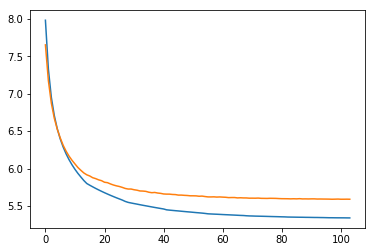

In [4]:
plot_loss(log_path_new_tw, 200)

In [6]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_98.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: やりたいです
tgt: わぁい ́∀♪松パートお願いしたい←←
1[-0.25]: はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい 
2[-0.25]: はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい 
3[-0.26]: はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい はい

1[-0.00]: うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん うん 
2[-0.01]: いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ いーえ 
3[-0.08]: いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえいえ いえい

# ☆　Only cleaning domain

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_em_cleaning0206

Use emotion: True

Checkpoint path: None

Pretrained: False

Fix embedding: False

decoder_learning_ratio: 5.0

batch_size: 16

UNK_id: 3

tfd_lambda: 0.4

max_epoch: 80

learning_rate: 1e-06

SOS_id: 1

MAX_UTTR_LEN: 100

l2_pooling: False

teacher_forcing_ratio: 1.0

EOS_id: 2

inf_last: False

decay_step: 600000

Minimize validation loss(8.0314) : 35 Epoch 
Minimize validation loss(8.0314) : 36 Epoch 


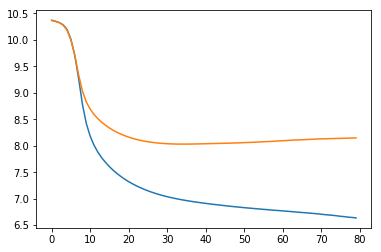

In [14]:
plot_loss(log_path_cleaning, 200)

### 学習はうまく行っていそうなのに、１単語しか発話しないしやっぱり厳しい

In [24]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_em_cleaning0206_30.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 役立たずなロボットだなぁ。
tgt: 役立たずなんて悲しいことを言わないで下さい。
tgt_emotion: sad
inf:  NONE
1[5.81]:  

inf:  neutral
1[5.82]:  

inf:  anger
1[5.82]:  

inf:  sad
1[5.82]:  

inf:  happy
1[5.82]:  

inf:  contentment
1[5.82]:  

Dial 2:
src: めんどくさいから嫌だ。
tgt: 掃除したら気持ちが良くなるよ。
tgt_emotion: sad
inf:  NONE
1[5.89]:  

inf:  neutral
1[5.89]:  

inf:  anger
1[5.89]:  

inf:  sad
1[5.89]:  

inf:  happy
1[5.89]:  

inf:  contentment
1[5.89]:  

Dial 3:
src: まぁ、そうだろうね。
tgt: でしょ。だから僕はきっと物にも魂があって大切にされたものがAさんのことも大切に思うんだと思うよ。
tgt_emotion: NONE
inf:  NONE
1[5.86]:  

inf:  neutral
1[5.87]:  

inf:  anger
1[5.87]:  

inf:  sad
1[5.87]:  

inf:  happy
1[5.87]:  

inf:  contentment
1[5.87]:  

Dial 4:
src: まだ大丈夫だよ〜
tgt: 部屋がゴミだらけになります。
tgt_emotion: neutral
inf:  NONE
1[5.61]:  

inf:  neutral
1[5.62]:  

inf:  anger
1[5.62]:  

inf:  sad
1[5.62]:  

inf:  happy
1[5.61]:  

inf:  contentment
1[5.63]:  

Dial 5:
src: なんで今そ

In [25]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_em_cleaning0206_80.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 後で。
tgt: .........。
tgt_emotion: sad
inf:  NONE
1[3.72]:  

inf:  neutral
1[3.72]:  

inf:  anger
1[3.72]:  

inf:  sad
1[3.72]:  

inf:  happy
1[3.72]:  

inf:  contentment
1[3.72]:  

Dial 2:
src: まだいいよ。
tgt: 部屋が汚く見えるから掃除してよ。
tgt_emotion: sad
inf:  NONE
1[3.76]:  

inf:  neutral
1[3.76]:  

inf:  anger
1[3.77]:  

inf:  sad
1[3.76]:  

inf:  happy
1[3.77]:  

inf:  contentment
1[3.77]:  

Dial 3:
src: 怒っているじゃないか。
tgt: 怒っていませんよ。自分の存在の無意味さにふがいなさを感じていただけです。
tgt_emotion: anger
inf:  NONE
1[3.77]:  

inf:  neutral
1[3.77]:  

inf:  anger
1[3.77]:  

inf:  sad
1[3.77]:  

inf:  happy
1[3.77]:  

inf:  contentment
1[3.78]:  

Dial 4:
src: そんな気分じゃない。
tgt: またそんなことを言って。
tgt_emotion: sad
inf:  NONE
1[3.75]:  

inf:  neutral
1[3.75]:  

inf:  anger
1[3.75]:  

inf:  sad
1[3.75]:  

inf:  happy
1[3.75]:  

inf:  contentment
1[3.76]:  

Dial 5:
src: ありがと。
tgt: 掃除進むごとに新しいダンスするから頑張ってね。
tgt_emotio

# ☆　twitter dataset -> cleaning domain

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0212_tw98_clean

Use emotion: True

Checkpoint path: ./model/pre_twitter_0206_98.mdl

Pretrained: True

Fix embedding: False

num_layers: 2

hidden_size: 256

MAX_UTTR_LEN: 100

decoder_learning_ratio: 5.0

inf_last: False

UNK_id: 3

dropout: 0.1

EOS_id: 2

batch_size: 16

SOS_id: 1

tfd_lambda: 0.4

lr_decay: 0.5773502691896258

max_epoch: 300

decay_step: 600000

max_gradient: 50.0

PAD_id: 0

Minimize validation loss(6.5132) : 15 Epoch 


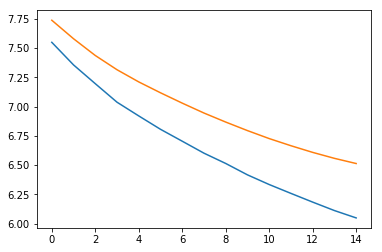

In [26]:
plot_loss(log_path_tw98_cl, 300)

# ☆　twitter dataset -> all domain

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0212_tw98_all

Use emotion: True

Checkpoint path: ./model/pre_twitter_0206_98.mdl

Pretrained: True

Fix embedding: False

MAX_UTTR_LEN: 100

dropout: 0.1

max_gradient: 50.0

decoder_learning_ratio: 5.0

UNK_id: 3

l2_pooling: False

SOS_id: 1

tfd_lambda: 0.4

inf_last: False

batch_size: 16

teacher_forcing_ratio: 1.0

num_layers: 2

decay_step: 600000

learning_rate: 1e-06

lr_decay: 0.5773502691896258

EOS_id: 2

Minimize validation loss(5.7456) : 28 Epoch 


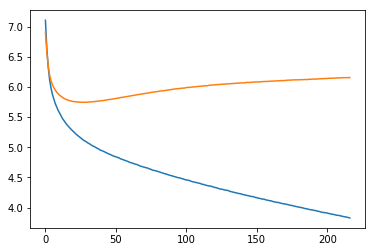

In [17]:
plot_loss(log_path_tw98_all, 300)

In [27]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_28.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: まだそんなに散らかっていないよ。
tgt: 足の踏み場もないくらいだけど。
tgt_emotion: anger
inf:  NONE
1[-0.86]: Aさん!!!!!!!!!!!!!! 

inf:  neutral
1[-0.96]: Aさん!!!!!!!!!!!!! 

inf:  anger
1[-0.73]: Aさん!!!!!!!!!!!!!!!! 

inf:  sad
1[-0.97]: Aさん!!!!!!!!!!!!! 

inf:  happy
1[-3.78]: Aさん。 

inf:  contentment
1[-3.79]: Aさん。 

Dial 2:
src: 怒ってるのかい。
tgt: いいえ?私もあなたの部屋のガラクタの一部に過ぎないのだと思っただけです。
tgt_emotion: anger
inf:  NONE
1[-0.51]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  neutral
1[-0.66]: Aさん!!!!!?!!!!!!!!!!!!!! 

inf:  anger
1[-0.17]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-0.56]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!! 

inf:  happy
1[-0.23]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  contentment
1[-0.58]: Aさん!!!!!?!!!!!!!!!!!!!!!!! 

Dial 3:
src: 少しくらい大丈夫だよ。
tgt: 部屋が汚いままだと健康に良くない。
tgt_emoti

In [28]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_50.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 忙しいんだよ。
tgt: 忙しいのに漫画読んでのかよ。
tgt_emotion: anger
inf:  NONE
1[-3.14]: Aさん! 

inf:  neutral
1[-3.18]: Aさん! 

inf:  anger
1[-0.17]: いいえ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-3.43]: Aさん! 

inf:  happy
1[-0.87]: Aさん!!!!!!!!!!!!! 

inf:  contentment
1[-0.94]: Aさん!!!!!!!!!!!! 

Dial 2:
src: わかったよ、やるよ。
tgt: ほら、だいぶきれいになりましたよ。
tgt_emotion: happy
inf:  NONE
1[-0.44]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  neutral
1[-0.71]: Aさん!!!!!!!!!!!!!!!! 

inf:  anger
1[-0.12]: いいえ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-0.62]: Aさん!!!!!!!!!!!!!!!!!!! 

inf:  happy
1[-0.21]: いいえ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  contentment
1[-0.23]: いいえ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [20]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_150.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: まだ生活するのに不便は感じない。
tgt: それでも何かと効率は落ちますよ。
tgt_emotion: sad
inf:  NONE
1[-3.01]: そんなこと言わずに! 

inf:  neutral
1[-2.87]: Aさんの生活改善指導をするようにしないと? 

inf:  anger
1[-2.75]: そんなこと言わずに! 

inf:  sad
1[-3.14]: そんなこと言わずに! 

inf:  happy
1[-2.78]: そんなこと言わずに! 

inf:  contentment
1[-2.84]: そんなこと言わずに! 

Dial 2:
src: 丈夫な体だから平気。
tgt: 過信しているといつか本当に体調が悪くなるよ。
tgt_emotion: sad
inf:  NONE
1[-1.96]: Aさんのためを思って言っているんですか? 

inf:  neutral
1[-1.98]: Aさんのためを思って言っているんですか? 

inf:  anger
1[-1.99]: Aさんのためを思って言っているんですか? 

inf:  sad
1[-2.05]: Aさんがゲームを止めてくれないと悲しいです。 

inf:  happy
1[-2.02]: Aさんのためを思って言っているんですか? 

inf:  contentment
1[-3.35]: Aさん!ありがとう! 

Dial 3:
src: いや、だからやめて...
tgt: 可哀想でしょうがありません。
tgt_emotion: NONE
inf:  NONE
1[-3.12]: そんなことはありません! 

inf:  neutral
1[-2.74]: Aさんの健康を考えて言っているのです。 

inf:  anger
1[-3.10]: そんなことはありません!! 

inf:  sad
1[-3.29]: そんなことはありません! 

inf:  happy
1[-3.05]: そんなことはありません! 

inf:  contentment
1[-

In [29]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_200.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: まだそんなに散らかっていないよ。
tgt: 足の踏み場もないくらいだけど。
tgt_emotion: anger
inf:  NONE
1[-2.89]: Aさんがゲームを止めていただけますか? 

inf:  neutral
1[-2.70]: Aさんの健康のために掃除しようよ。 

inf:  anger
1[-3.05]: Aさんがゲームを止めていただけますか? 

inf:  sad
1[-1.94]: Aさんがゲームを止めてくれないと悲しいです。 

inf:  happy
1[-2.97]: Aさんがゲームを止めていただけますか? 

inf:  contentment
1[-2.68]: Aさんの健康のために掃除しようよ。 

Dial 2:
src: そうかなの?
tgt: ほら、始めたらすぐ終わりますよ
tgt_emotion: sad
inf:  NONE
1[-2.21]: そうだよ! 

inf:  neutral
1[-2.19]: そうだよ! 

inf:  anger
1[-2.21]: そうだよ! 

inf:  sad
1[-2.23]: そうだよ! 

inf:  happy
1[-2.22]: そうだよ! 

inf:  contentment
1[-2.18]: そうだよ! 

Dial 3:
src: わかったよ。しょうがないなあ。
tgt: 分かれば良いんですよ。
tgt_emotion: contentment
inf:  NONE
1[-2.50]: Aさんのために言っているのですか? 

inf:  neutral
1[-2.50]: Aさんのために言っているのですか? 

inf:  anger
1[-1.90]: Aさんのためを思って言っているのですか? 

inf:  sad
1[-2.63]: Aさんのために言っているのですか? 

inf:  happy
1[-2.55]: Aさんのために言っているのですか? 

inf:  contentment
1[-2.46]: Aさんのために言っているのですか

# ☆　twitter dataset(former) -> all domain -> cleaning

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0208_tw5_all10_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_10.mdl

Pretrained: True

Fix embedding: False

decay_step: 600000

EOS_id: 2

num_layers: 2

MAX_UTTR_LEN: 100

learning_rate: 1e-07

SOS_id: 1

teacher_forcing_ratio: 1.0

hidden_size: 256

Minimize validation loss(5.8339) : 313 Epoch 
Minimize validation loss(5.8339) : 314 Epoch 
Minimize validation loss(5.8339) : 315 Epoch 
Minimize validation loss(5.8339) : 316 Epoch 
Minimize validation loss(5.8339) : 317 Epoch 
Minimize validation loss(5.8339) : 318 Epoch 
Minimize validation loss(5.8339) : 319 Epoch 
Minimize validation loss(5.8339) : 320 Epoch 
Minimize validation loss(5.8339) : 321 Epoch 


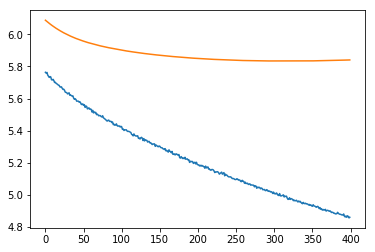

In [149]:
plot_loss(log_path_tw5_all10_cl, 400)

In [151]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_tw5_all10_clean_320.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/0208_tw5_all10_clean_320.mdl
INFO:logger:Use emotion: True
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:PAD_id: 0
INFO:logger:learning_rate: 1e-07
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:decay_step: 600000
INFO:logger:tfd_lambda: 0.4
INFO:logger:len_alpha: 0.6
INFO:logger:suppress_lambda: 1.0
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:eos_gamma: 0.05
INFO:logger:l2_pooling: False
INFO:logger:max_epoch: 400
INFO:logger:EOS_id: 2
INFO:logger:beam_width: 5
INFO:logger:use_emotion: True
INFO:logger:batch_size: 1
INFO:logger:inf_last: False
INFO:logger:UNK_id: 3
INFO:logger.dataset:Reading files...
INFO:logger.data

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 怒ればいいじゃん。
tgt: 掃除しないともう話をしない。
tgt_emotion: anger
inf:  NONE
1[-3.15]: どうして怒るのですか? 
2[-3.22]: どうして怒るんだよ! 
3[-3.54]: どうして怒るんだ! 

inf:  neutral
1[-3.15]: どうして怒るのですか? 
2[-3.19]: どうして怒るんだよ! 
3[-3.52]: どうして怒るんだ! 

inf:  anger
1[-3.17]: どうして怒るんだよ! 
2[-3.17]: どうして怒るのですか? 
3[-3.50]: どうして怒るんだ! 

inf:  sad
1[-3.20]: どうして怒るのですか? 
2[-3.24]: どうして怒るんだよ! 
3[-3.59]: どうして怒るんだ! 

inf:  happy
1[-3.14]: どうして怒るのですか? 
2[-3.17]: どうして怒るんだよ! 
3[-3.50]: どうして怒るんだ! 

inf:  contentment
1[-3.17]: どうして怒るのですか? 
2[-3.27]: どうして怒るんだよ! 
3[-3.58]: どうして怒るんだ! 

Dial 2:
src: そーだね。
tgt: お部屋きれいにしたらスムーズにお出かけできるよね。
tgt_emotion: NONE
inf:  NONE
1[-4.07]: Aさんのために頑張りましょう。 
2[-4.43]: Aさんにとって大切な!? 
3[-4.66]: Aさんにとって大切な! 

inf:  neutral
1[-2.61]: Aさんのために一緒に掃除しましょう! 
2[-2.81]: Aさんのために一緒に掃除しましょう!? 
3[-3.18]: Aさんのために一緒に掃除しましょう? 

inf:  anger
1[-2.59]: Aさんのために一緒に掃除しましょう! 
2[-2.78]: Aさんのために一緒に掃除しましょう!? 
3[-3.19]: Aさんのために一緒に掃除しましょう? 

inf

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_all40_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_40.mdl

Pretrained: True

Fix embedding: False

PAD_id: 0

l2_pooling: False

num_layers: 2

learning_rate: 1e-06

teacher_forcing_ratio: 1.0

dropout: 0.1

tfd_lambda: 0.4

UNK_id: 3

Minimize validation loss(5.7679) : 14 Epoch 


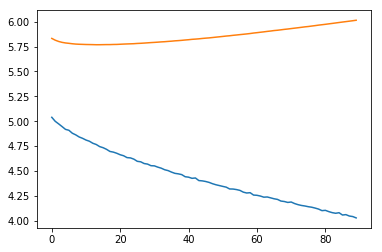

In [118]:
plot_loss(log_path_cleaning, 90)

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_all34_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_34.mdl

Pretrained: True

Fix embedding: False

SOS_id: 1

decay_step: 600000

PAD_id: 0

EOS_id: 2

MAX_UTTR_LEN: 100

tfd_lambda: 0.4

batch_size: 16

learning_rate: 1e-07

Minimize validation loss(5.7615) : 90 Epoch 


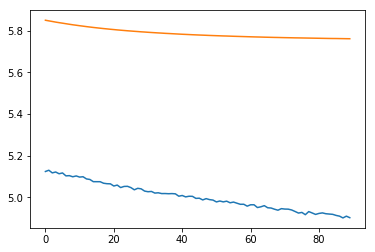

In [110]:
plot_loss(log_path_tw5_all34_cl, 300)

In [112]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_all34_clean_90.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 本当に掃除が嫌いなんだ。
tgt: こんなに部屋が汚いと友達も来てくれなくなるよ。
tgt_emotion: NONE
inf:  NONE
1[-3.74]: 掃除をしましょう! 
2[-3.95]: 掃除をしてくれますか。 
3[-4.11]: 掃除をしましょう。 

inf:  neutral
1[-3.70]: 掃除をしましょう! 
2[-4.03]: 掃除をしてくれますか。 
3[-4.14]: 掃除をしましょう。 

inf:  anger
1[-3.62]: 掃除をしましょう! 
2[-4.06]: 掃除をしてくれますか。 
3[-4.18]: 掃除をしましょう。 

inf:  sad
1[-3.83]: 掃除をしましょう! 
2[-3.93]: 掃除をしてくれますか。 
3[-4.13]: 掃除をしましょう。 

inf:  happy
1[-3.64]: 掃除をしましょう! 
2[-4.03]: 掃除をしてくれますか。 
3[-4.12]: 掃除をしましょう。 

inf:  contentment
1[-3.86]: 掃除をしましょう! 
2[-3.97]: 掃除をしてくれますか。 
3[-4.10]: 掃除をしましょう。 

Dial 2:
src: 風邪かもしれないよ。
tgt: 現実から目を背けていたら駄目だよ。
tgt_emotion: anger
inf:  NONE
1[-3.70]: 風邪ひきましょう。 
2[-3.80]: 風邪ひきませんか? 
3[-4.01]: 風邪ひきませんか。 

inf:  neutral
1[-3.69]: 風邪ひきましょう。 
2[-3.80]: 風邪ひきませんか? 
3[-4.02]: 風邪ひきましょう 

inf:  anger
1[-3.70]: 風邪ひきましょう。 
2[-3.79]: 風邪ひきませんか? 
3[-4.01]: 風邪ひきませんか! 

inf:  sad
1[-3.67]: 風邪ひきましょう。 
2[-3.86]: 風邪ひきませんか? 
3[-4.03]: 風邪ひきませ

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f0748bcb7f0>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

# ☆　twitter dataset(former) -> all domain -> cleaning

In [ ]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_all34_clean_90.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

# ☆　OpenSubtitles 

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0212_op

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

decoder_learning_ratio: 5.0

learning_rate: 0.0001

teacher_forcing_ratio: 1.0

decay_step: 600000

num_layers: 2

tfd_lambda: 0.4

EOS_id: 2

lr_decay: 0.5773502691896258

SOS_id: 1

batch_size: 256

MAX_UTTR_LEN: 100

PAD_id: 0

Minimize validation loss(5.1113) : 8 Epoch 


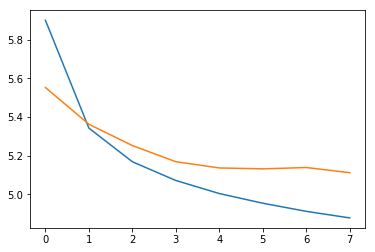

In [12]:
plot_loss(log_path_op,25)

# ☆　OpenSubtitles -> cleaning

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/pre_op_0128

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

decay_step: 600000

learning_rate: 0.0001

decoder_learning_ratio: 5.0

PAD_id: 0

num_layers: 2

dropout: 0.1

batch_size: 64

hidden_size: 256

Minimize validation loss(4.9577) : 13 Epoch 


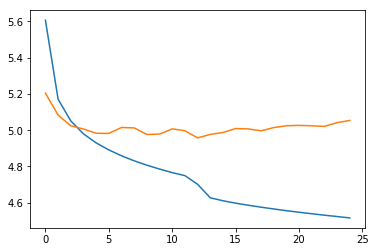

In [19]:
plot_loss(log_path_op,25)

In [16]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/em_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:learning_rate: 0.0001
INFO:logger:EOS_id: 2
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:decay_step: 600000
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:PAD_id: 0
INFO:logger:use_emotion: True
INFO:logger:max_epoch: 50
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:dropout: 0.1
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 気分が乗らないんだ。
tgt: この先も気分が乗ってくる保証はありませんよ。
tgt_emotion: sad
inf:  NONE
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  neutral
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.79]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  anger
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.79]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  sad
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.59]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  happy
1[-0.46]: 部屋が汚いまま部屋が汚いまま部屋が汚れています。 
2[-0.49]: 部屋が汚いまま部屋が汚いまま部屋が汚れていますよ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  contentment
1[-0.47]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.57]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

Dial 2:
src: もうある程度の場所は覚えたよ。
tgt: これだけ物が散乱していると掃除機をかけることも出来ないじゃない。
tgt_emotion: anger
inf:  NONE
1[-0.95]: 部屋が汚いまま部屋が汚れています。 
2[

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0208_op13_all

Use emotion: True

Checkpoint path: ./model/pre_op_0128_13.mdl

Pretrained: True

Fix embedding: False

dropout: 0.1

tfd_lambda: 0.4

lr_decay: 0.5773502691896258

num_layers: 2

SOS_id: 1

max_gradient: 50.0

max_epoch: 400

teacher_forcing_ratio: 1.0

decay_step: 600000

decoder_learning_ratio: 5.0

l2_pooling: False

hidden_size: 256

batch_size: 16

Minimize validation loss(4.3501) : 206 Epoch 
Minimize validation loss(4.3501) : 207 Epoch 


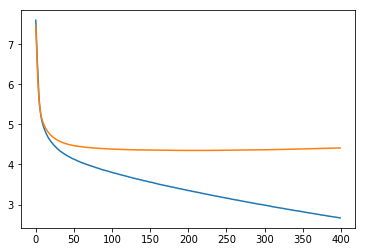

In [75]:
plot_loss(log_path_op13_all,400)

In [3]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op13_all_2.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 僕はアレルギーもないし、大丈夫だよ。
tgt: でも放っておくとダニや害虫も増えますよ。
tgt_emotion: sad
inf:  NONE
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  neutral
1[-0.24]: じゃぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  anger
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  sad
1[-0.24]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  happy
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  contentment
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

Dial 2:
src: おーい。
tgt: ...。
tgt_emotion: NONE
inf:  NONE
1[-3.18]: おはようご

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f342002fa20>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

In [1]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op13_all_100.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 面倒くさいから嫌だよ。
tgt: こんなにホコリが積もっている部屋で寝るのは健康にも良くないですよ。
tgt_emotion: sad
inf:  NONE
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  neutral
1[-0.10]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  anger
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  sad
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  happy
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  contentment
1[-0.10]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

Dial 2:
src: わかった。
tgt: じゃあ僕応援するね。
tgt_emo